# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

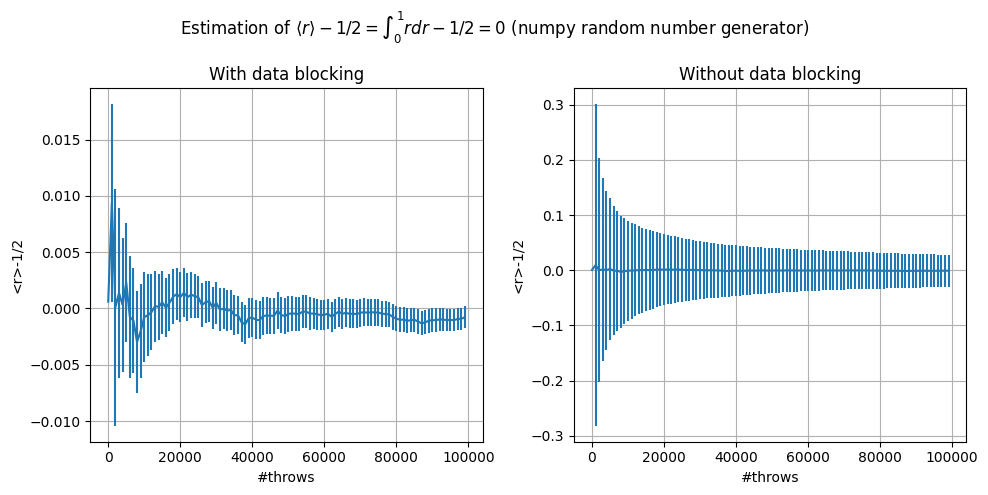

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block (please use for M a multiple of N)
np.random.seed(1)     # Fixing random seed for reproducibility
r = np.random.rand(M) # U[0,1) uniform distribution
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
ave2 = np.zeros(N)
sum_prog = np.zeros(N)
sum2_prog = np.zeros(N)
err_prog = np.zeros(N)
ave2_TEST = np.zeros(N)
sum2_prog_TEST = np.zeros(N)
err_prog_TEST = np.zeros(N)

for i in range(N):
    sum = 0
    sum_TEST = 0 #TEST to show a typical mistake on the computation of A_i^2
    for j in range(L):
        k = j+i*L
        sum += r[k]
        sum_TEST += r[k]*r[k] #TEST 
    ave[i] = sum/L             # r_i 
    ave2[i] = (ave[i])**2      # (r_i)^2
    ave2_TEST[i] = sum_TEST/L  # (r_i)^2

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        sum2_prog[i] += ave2[j] # SUM_{j=0,i} (r_j)^2
        sum2_prog_TEST[i] += ave2_TEST[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    sum2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,sum2_prog,i) # Statistical uncertainty
    sum2_prog_TEST[i]/=(i+1) # Cumulative square average
    err_prog_TEST[i] = error(sum_prog,sum2_prog_TEST,i) # Statistical uncertainty        
    

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
x*=L # Number of throws = block * (Number of throws in each block)

plt.suptitle('Estimation of ' r'$\langle r \rangle -1/2 = \int_0^1 r dr -1/2 = 0$ (numpy random number generator)')

# print('Be careful in the computation of the error!')

ax1.errorbar(x,sum_prog-0.5,yerr=err_prog)
ax1.set_xlabel('#throws')
ax1.set_ylabel('<r>-1/2')
ax1.set_title('With data blocking')
ax1.grid(True)

ax2.errorbar(x,sum_prog-0.5,yerr=err_prog_TEST)
ax2.set_xlabel('#throws')
ax2.set_ylabel('<r>-1/2')
ax2.set_title('Without data blocking')
ax2.grid(True)

plt.tight_layout()
plt.show()

In these graphs, it is clearly shown how one can be easily mistaken in the computation of the statistical error. In computing the statistical uncertainties, i.e. the standard deviation of the mean, we need an estimation of the variance $\sigma^2$, the second central moment. The variance can be computed from

\begin{equation}
\sigma^2_A := \langle (A - \langle A \rangle)^2 \rangle = \langle A^2 \rangle - \langle A \rangle^2
\end{equation}

If a Monte Carlo estimation of $A$ is obtained from a calculation that uses $M$ Monte Carlo "steps", we can always divide these $M$ Monte Carlo "steps" into $N$ blocks, with $N < M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$. Let us call it $A_i$ with $i=1,\ldots,N$, and then you also have $A^2_i$ with $i=1,\ldots,N$.

At this point, everything becomes clear:

\begin{equation}
\langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A \rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2
\end{equation}

and finally, the statistical uncertainty with $N$:

\begin{equation}
\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]}
\end{equation}

Data blocking is very important because it reduces the correlation between subsequent blocks; it is the main way to reproduce uncorrelated measurements and to simulate a real experiment. Of course, to this aim, $N$ shouldn't be too big: in the extreme case in which $N=M$, we have blocks of length $L=1$, and our problem remains. These considerations are much more evident in the graphs above. The right one clearly doesn't reproduce a real-life experiment. Moreover, there is a conceptual problem in the computation of the error, which turns out to be greater than the fluctuation of the mean value itself! When data is correlated, the error is not the standard deviation of the mean.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

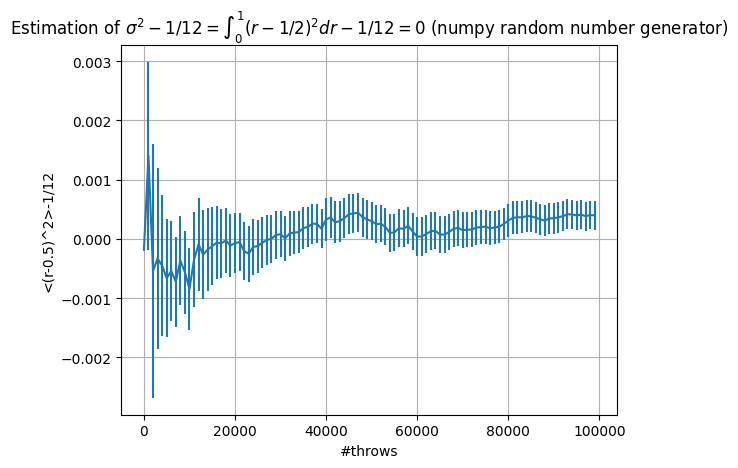

In [22]:
# Continue using variables and functions of the previous code cell
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.title('Estimation of ' r'$\sigma^2 - 1/12 = \int_0^1 (r-1/2)^2 dr -1/12 = 0$ (numpy random number generator)')
plt.grid(True)
plt.show()

Now, I tried to do the exact same thing but using the Pseudo-Random Number generator downloaded from the NSL Ariel website. This is a way to test it and verify if it is efficient.

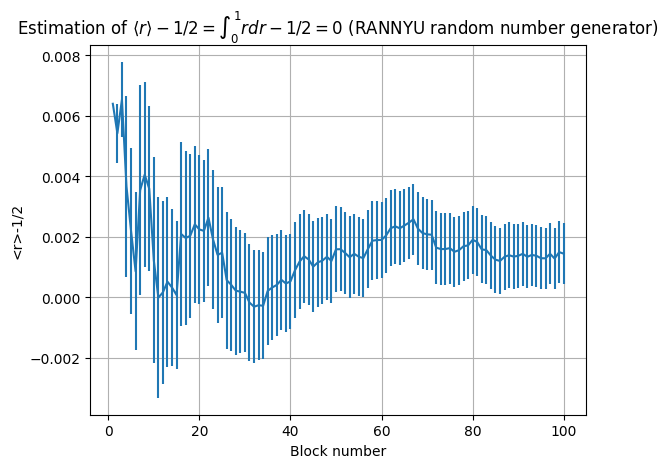

In [23]:
x, f, error = np.loadtxt("Risultati1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f-0.5,yerr=error)
plt.xlabel('Block number')
plt.ylabel('<r>-1/2')
plt.title('Estimation of ' r'$\langle r \rangle -1/2 = \int_0^1 r dr -1/2 = 0$ (RANNYU random number generator)')
plt.grid(True)
plt.show()

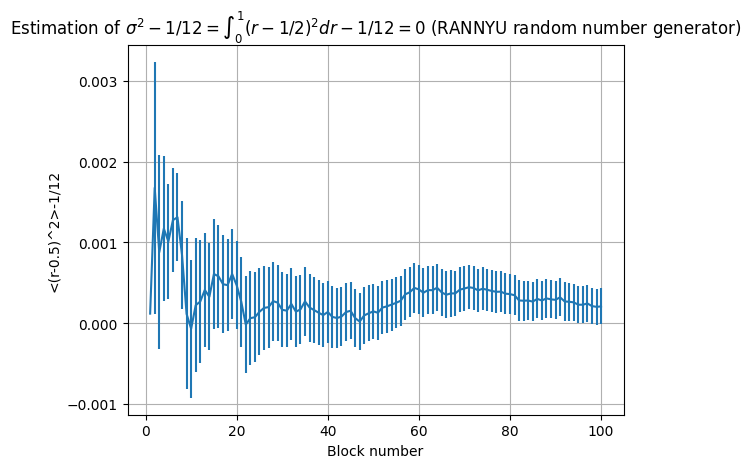

In [24]:
x, f, error = np.loadtxt("Risultati2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f-1/12,yerr=error)
plt.xlabel('Block number')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.title('Estimation of ' r'$\sigma^2 - 1/12 = \int_0^1 (r-1/2)^2 dr -1/12 = 0$ (RANNYU random number generator)')
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

In the following pictures, I pushed the value of $j$ up to $1000$.

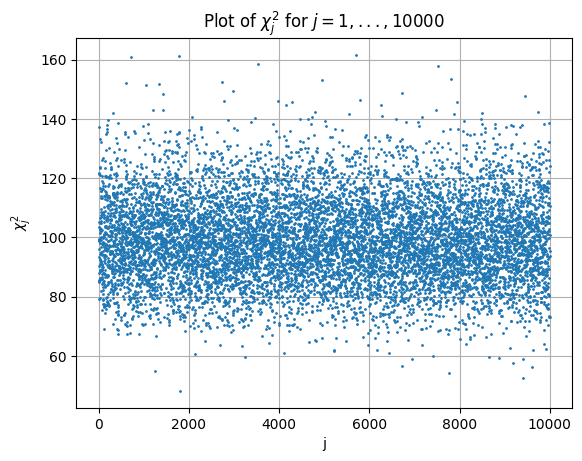

In [25]:
x, f = np.loadtxt("Risultati3.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x, f, 'o', markersize=1)
plt.xlabel('j')
plt.ylabel(r'$\chi^2_j$')
plt.title('Plot of ' r'$\chi^2_j$ for $j=1, ..., 10000$')
plt.grid(True)
plt.show()

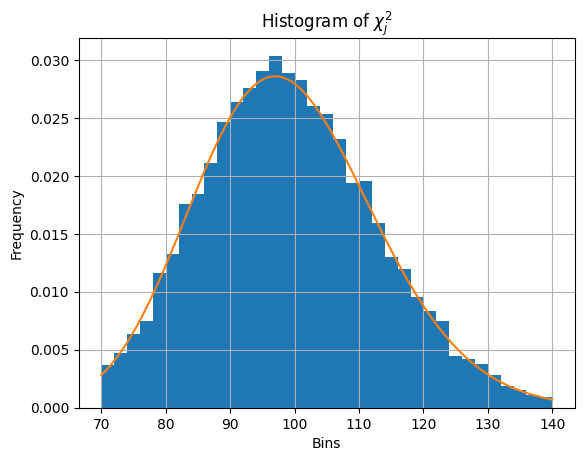

In [27]:
from scipy.stats import chi2

y = np.loadtxt("Risultati3.dat", usecols=(1), unpack=True)

# Define the degrees of freedom and create a range for the random values
df = 100-1  # degrees of freedom

x = np.linspace(70, 140, 1000)  # range for the random values

# probability distribution
pdf = chi2.pdf(x, df)   

n_bins = 35 # define number of bins
n, bins, patches = plt.hist(y, n_bins, range=(70, 140), density=True) # plotting histogram

plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram of ' r'$\chi^2_j$')
plt.plot(x, pdf)
plt.grid(True)
plt.show()

An interesting observation about the histogram above is the number of degrees of freedom. At first, I thought they would have been $100$, but the fit was more accurate with $d=99$. This made me think about any constraint that may reduce the degrees of freedom. The explanation that I found is the following: after filling the bins from the first up to the second last, the last bin has a fixed number of elements given by the remaining number of elements in the batch. Evidently, this fact reduces the degrees of freedom.

Beyond this, it is remarkable how well the Parallel Random Generator works. It may seem not too good if one only observes the plot of the $\chi^2_j$, but if we compare the true probability distribution with a histogram, they are remarkably neat.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

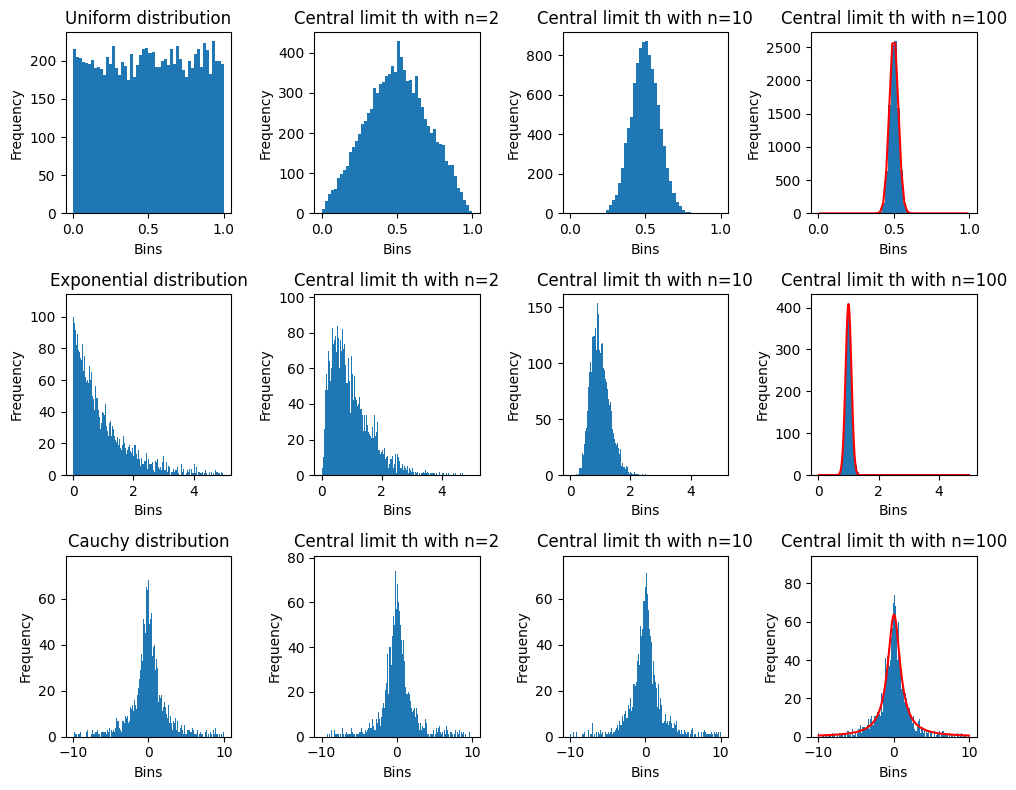

In [28]:
from scipy.optimize import curve_fit

# Caricamento dei dati
x, y, z, w = np.loadtxt("Risultati4.dat", usecols=(0, 1, 2, 3), unpack=True)
a, b, c, d = np.loadtxt("Risultati5.dat", usecols=(0, 1, 2, 3), unpack=True)
i, j, k, l = np.loadtxt("Risultati6.dat", usecols=(0, 1, 2, 3), unpack=True)

# Creazione della griglia di subplot
fig, axs = plt.subplots(3, 4, figsize=(10, 8))

# Definizio della fitting function gaussiana
def f(t,ampl,sigma,x0):  
    return ampl * np.exp(-((t - x0) / sigma)**2)

# Definizio della fitting function lorentziana
def g(h, cost, gamma, mu):
    return cost / (1 + ((h - mu) / gamma)**2)

#############################################################

# Definizione del numero di bin
n_bins_u = 50
bin_range_u = (0, 1)

# Istogramma per x
axs[0, 0].hist(x, bins=n_bins_u, range=bin_range_u)
axs[0, 0].set_title('Uniform distribution')
axs[0, 0].set_xlabel('Bins')
axs[0, 0].set_ylabel('Frequency')

# Istogramma per y
axs[0, 1].hist(y, bins=n_bins_u, range=bin_range_u)
axs[0, 1].set_title('Central limit th with n=2')
axs[0, 1].set_xlabel('Bins')
axs[0, 1].set_ylabel('Frequency')

# Istogramma per z
axs[0, 2].hist(z, bins=n_bins_u, range=bin_range_u)
axs[0, 2].set_title('Central limit th with n=10')
axs[0, 2].set_xlabel('Bins')
axs[0, 2].set_ylabel('Frequency')

# Adattamento della gaussiana all'istogramma per w
hist_w, bins_w, _ = axs[0, 3].hist(w, bins=n_bins_u, range=bin_range_u)
bin_centers_w = (bins_w[:-1] + bins_w[1:]) / 2

# Definizione dei parametri iniziali per l'adattamento
initial_guess = [1, 0.5, 0.5]  # Ampl, sigma, x0

# Adattamento della gaussiana all'istogramma
popt_w, _ = curve_fit(f, bin_centers_w, hist_w, p0=initial_guess)

# Tracciamento della gaussiana adattata sull'istogramma
axs[0, 3].plot(bin_centers_w, f(bin_centers_w, *popt_w), 'r-')

# Impostazione del titolo e delle etichette degli assi
axs[0, 3].set_title('Central limit th with n=100')
axs[0, 3].set_xlabel('Bins')
axs[0, 3].set_ylabel('Frequency')

#############################################################

# Definizione del numero di bin
n_bins_exp = 500
bin_range_exp = (0, 5)

# Istogramma per a
axs[1, 0].hist(a, bins=n_bins_exp, range=bin_range_exp)
axs[1, 0].set_title('Exponential distribution')
axs[1, 0].set_xlabel('Bins')
axs[1, 0].set_ylabel('Frequency')

# Istogramma per b
axs[1, 1].hist(b, bins=n_bins_exp, range=bin_range_exp)
axs[1, 1].set_title('Central limit th with n=2')
axs[1, 1].set_xlabel('Bins')
axs[1, 1].set_ylabel('Frequency')

# Istogramma per c
axs[1, 2].hist(c, bins=n_bins_exp, range=bin_range_exp)
axs[1, 2].set_title('Central limit th with n=10')
axs[1, 2].set_xlabel('Bins')
axs[1, 2].set_ylabel('Frequency')

# Adattamento della gaussiana all'istogramma per d
hist_d, bins_d, _ = axs[1, 3].hist(d, bins=n_bins_exp, range=bin_range_exp)
bin_centers_d = (bins_d[:-1] + bins_d[1:]) / 2

# Adattamento della gaussiana all'istogramma
popt_d, _ = curve_fit(f, bin_centers_d, hist_d, p0=initial_guess)

# Tracciamento della gaussiana adattata sull'istogramma
axs[1, 3].plot(bin_centers_d, f(bin_centers_d, *popt_d), 'r-')

# Impostazione del titolo e delle etichette degli assi
axs[1, 3].set_title('Central limit th with n=100')
axs[1, 3].set_xlabel('Bins')
axs[1, 3].set_ylabel('Frequency')

#############################################################

# Definizione del numero di bin
n_bins_cau = 1000
bin_range_cau = (-10, 10)

# Istogramma per i
axs[2, 0].hist(i, bins=n_bins_cau, range=bin_range_cau)
axs[2, 0].set_title('Cauchy distribution')
axs[2, 0].set_xlabel('Bins')
axs[2, 0].set_ylabel('Frequency')

# Istogramma per j
axs[2, 1].hist(j, bins=n_bins_cau, range=bin_range_cau)
axs[2, 1].set_title('Central limit th with n=2')
axs[2, 1].set_xlabel('Bins')
axs[2, 1].set_ylabel('Frequency')

# Istogramma per k
axs[2, 2].hist(k, bins=n_bins_cau, range=bin_range_cau)
axs[2, 2].set_title('Central limit th with n=10')
axs[2, 2].set_xlabel('Bins')
axs[2, 2].set_ylabel('Frequency')

# Adattamento della lorentziana all'istogramma per l
hist_l, bins_l, _ = axs[2, 3].hist(l, bins=n_bins_cau, range=bin_range_cau)
bin_centers_l = (bins_l[:-1] + bins_l[1:]) / 2

# Adattamento della lorentziana all'istogramma
popt_l, _ = curve_fit(g, bin_centers_l, hist_l, p0=initial_guess)

# Tracciamento della lorentziana adattata sull'istogramma
axs[2, 3].plot(bin_centers_l, g(bin_centers_l, *popt_l), 'r-')

# Impostazione del titolo e delle etichette degli assi
axs[2, 3].set_title('Central limit th with n=100')
axs[2, 3].set_xlabel('Bins')
axs[2, 3].set_ylabel('Frequency')

#############################################################

# Ottimizzazione del layout
plt.tight_layout()

# Visualizzazione
plt.show()

Everything goes as the central limit theorem predicts. Note that in the case of the Lorentzian peak, we do not expect a Gaussian distribution (Lorentzian curves have infinite variance, so they do not satisfy one of the central limit theorem hypotheses), but we expect again a Lorentzian distribution.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

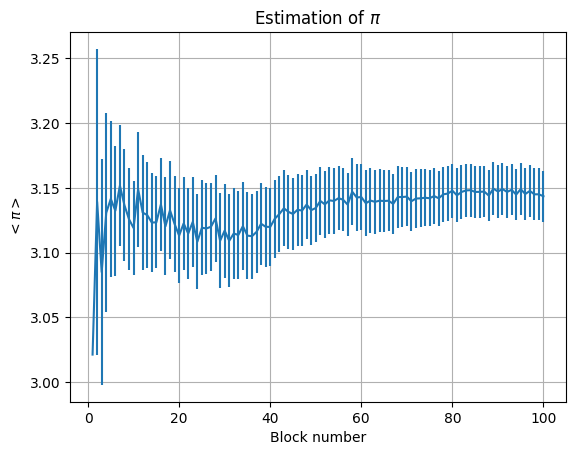

In [30]:
x, f, error = np.loadtxt("Risultati7.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Block number')
plt.ylabel(r'$<\pi>$')
plt.title('Estimation of ' r'$\pi$')
plt.grid(True)
plt.show()

Here I simulated the Buffon's experiment with $M = 100000$ throws divided into $N = 100$ blocks (so that every block has $L = M / N$ throws). I used as variables the midpoint of the needle and the acute angle between the vertical and the needle. I chose the length of the needle as $l=1$ and the distance between lines as $d=2$. Of course, given that the lattice has the same repeated structure, I only set two lines.

The main conceptual problem I found concerned the observation "*If possible, do not use $\pi$ to evaluate $\pi$.*" This initially discouraged me from using an angle as a variable. In fact, how could I extract an angle without using the real value of $\pi$? Well, I asked myself: why do I have to use the *real* value of $\pi$? 

In my code, I assumed $\pi=3$ initially and I substituted it with the value given by the algorithm. So initially, the angle extraction isn't very accurate, but it improves after every iteration. I don't really know how this happens (there is no convergence theorem, that I am aware of, that can assure that the algorithm will converge to the real value of $\pi$) but it seems reasonable, and the simulation proves me right. Or better: it doesn't prove me wrong.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?